In [1]:
import pandas as pd
import numpy as np

import env
import wrangle

In [2]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
import seaborn as sns

**Goal** Construct model for property value prediction
Target 
- single unit properties
- transactions within May & June in 2017

**OFFICIAL ZILLOW DEFINITION OF HOME TYPES AND HOUSING STOCK**

- Defines all homes as single-family, condominium and co-operative homes with a county record. Unless specified, all series cover this segment of the housing stock.

- Condo/Co-op: Condominium and co-operative homes.

- Multifamily 2+ units: Units in buildings with 5 or more housing units, that are not a condominiums or co-ops.

- Duplex/Triplex: Housing units in buildings with 2 or 3 housing units.

In [3]:
# Focus on single family residential, which represents the largest subset of data within the requested time range
# meanwhile, "single" family residential represents "single unit property" among all property types 
select_property = wrangle.get_data_from_mysql()
select_property

,Property Type,Property Count
0,Commercial/Office/Residential Mixed Used,4
1,"Duplex (2 Units, Any Combination)",513
2,"Triplex (3 Units, Any Combination)",149
3,"Quadruplex (4 Units, Any Combination)",221
4,Residential General,12
5,Single Family Residential,15036
6,Mobile Home,18
7,Townhouse,2
8,Cluster Home,93
9,Condominium,5292


In [5]:
df = wrangle.get_data_from_mysql()
df

,id,parcelid,logerror,transactiondate,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,1248,11289917,-0.362001,2017-06-23,2061546,11289917,1.0,NaN,NaN,2.0,...,NaN,NaN,108890.0,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13
1,1772,11705026,-0.146056,2017-06-30,1834372,11705026,NaN,NaN,NaN,1.0,...,NaN,NaN,11982.0,35606.0,2016.0,23624.0,543.69,None,NaN,6.037232e+13
2,2028,14269464,0.021085,2017-06-01,1923117,14269464,NaN,NaN,NaN,3.0,...,NaN,NaN,434887.0,880456.0,2016.0,445569.0,9819.72,None,NaN,6.059064e+13
3,3273,11389003,-0.325393,2017-06-01,2121349,11389003,NaN,NaN,NaN,2.0,...,NaN,NaN,165000.0,614000.0,2016.0,449000.0,7673.19,None,NaN,6.037703e+13
4,3429,11967869,-0.005566,2017-06-29,2093710,11967869,NaN,NaN,NaN,1.0,...,NaN,NaN,82416.0,274237.0,2016.0,191821.0,3267.47,None,NaN,6.037185e+13
5,3908,11696784,-0.124790,2017-06-16,496818,11696784,NaN,NaN,NaN,0.0,...,NaN,NaN,41137.0,168828.0,2016.0,127691.0,2135.39,None,NaN,6.037235e+13
6,5931,14236060,-0.088701,2017-05-19,2964522,14236060,NaN,NaN,NaN,2.0,...,1.0,NaN,110980.0,196483.0,2016.0,85503.0,2376.34,None,NaN,6.059076e+13
7,6926,14365030,0.063343,2017-05-01,1175489,14365030,NaN,NaN,NaN,2.5,...,NaN,NaN,170376.0,605000.0,2016.0,434624.0,6185.28,None,NaN,6.059052e+13
8,7018,14008322,-0.047948,2017-05-18,950579,14008322,NaN,NaN,NaN,1.0,...,1.0,NaN,32792.0,141875.0,2016.0,109083.0,2015.78,None,NaN,6.059088e+13
9,7085,11552513,-0.226048,2017-05-17,570983,11552513,NaN,NaN,NaN,2.0,...,NaN,NaN,97367.0,486866.0,2016.0,389499.0,5990.50,None,NaN,6.037271e+13


In [26]:
number_missing_per_row = df.isnull().sum(axis=1)
number_missing_per_row.describe()

count    15012.000000
mean        27.796363
std          1.628073
min         20.000000
25%         27.000000
50%         28.000000
75%         29.000000
max         35.000000
dtype: float64

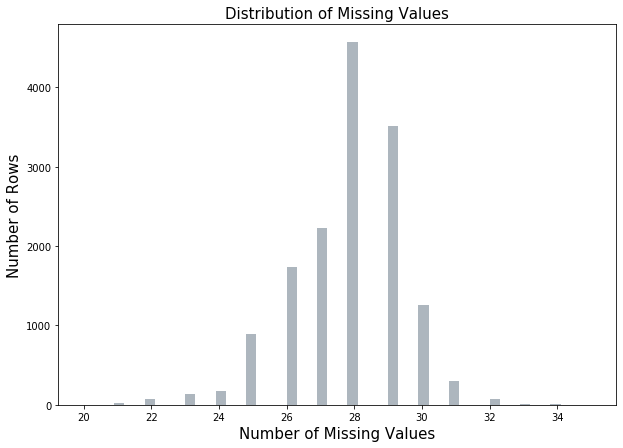

In [7]:
# Observe distribution of missing data across each row
# total number of columns (id excluded) is 57

# conclude: 
# no property is missing all data category( column)
# on average, 28 data types were missing from each row

plt.rcParams['figure.figsize'] = [10, 7]
number_missing_per_row = df.isnull().sum(axis=1)
sns.distplot(number_missing_per_row, color="#34495e", kde=False);
plt.title('Distribution of Missing Values', fontsize=15)
plt.xlabel('Number of Missing Values', fontsize=15)
plt.ylabel('Number of Rows', fontsize=15);

In [86]:
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Variable_Name', 'Number_Missing_Values']
missing_values['Percent_Missing'] = missing_values['Number_Missing_Values'] / len(df)
missing_values

,Variable_Name,Number_Missing_Values,Percent_Missing
0,id,0,0.000000
1,parcelid,0,0.000000
2,logerror,0,0.000000
3,transactiondate,0,0.000000
4,id,0,0.000000
5,parcelid,0,0.000000
6,airconditioningtypeid,11030,0.734746
7,architecturalstyletypeid,14997,0.999001
8,basementsqft,15001,0.999267
9,bathroomcnt,0,0.000000


In [87]:
missing_col = (missing_values.Percent_Missing < 0.40).sum() / len(missing_values)
print("Percent of Columns not appropriate to be included as modeling variable {:.2f}".format(missing_col))

Percent of Columns not appropriate to be included as modeling variable 0.54


**Review data across columns & explore potential features for modeling**

unitcnt
yearbuilt

**layout** bathroomcnt, bedroomcnt, roomcnt

**Size** calculatedfinishedsquarefeet, lotsizesquarefeet

heatingorsystemtypeid

**Geo** latitude & longitude, regionidcity, regionidcounty, regionidzip

**tax** structuretaxvaluedollarcnt, taxvaluedollarcnt, assessmentyear, landtaxvaluedollarcnt, taxamount

In [85]:
# extract potential features having enough data
use_data = missing_values.Variable_Name[missing_values.Percent_Missing < 0.40]
use_data

0                               id
1                         parcelid
2                         logerror
3                  transactiondate
4                               id
5                         parcelid
9                      bathroomcnt
10                      bedroomcnt
12           buildingqualitytypeid
13               calculatedbathnbr
16    calculatedfinishedsquarefeet
17            finishedsquarefeet12
22                            fips
24                     fullbathcnt
28           heatingorsystemtypeid
29                        latitude
30                       longitude
31               lotsizesquarefeet
37       propertycountylandusecode
38           propertylandusetypeid
39              propertyzoningdesc
40          rawcensustractandblock
41                    regionidcity
42                  regionidcounty
44                     regionidzip
45                         roomcnt
49                         unitcnt
52                       yearbuilt
55      structuretax

In [1]:
import env
import wrangle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = wrangle.get_data_from_mysql()
new_name = ["tax", "bath", "bed", "room_cnt", "sqft", "lot_size"] 
df.rename(columns=dict(zip(df.columns, new_name)), inplace = True)
df.isna().sum()
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14912 entries, 0 to 15011
Data columns (total 6 columns):
tax         14912 non-null float64
bath        14912 non-null float64
bed         14912 non-null float64
room_cnt    14912 non-null float64
sqft        14912 non-null float64
lot_size    14912 non-null float64
dtypes: float64(6)
memory usage: 815.5 KB


**Correlation of property value and following features**
- strong correlation: bath, sqft
- medium-to-low: bed
- low: lot_size & room_cnt

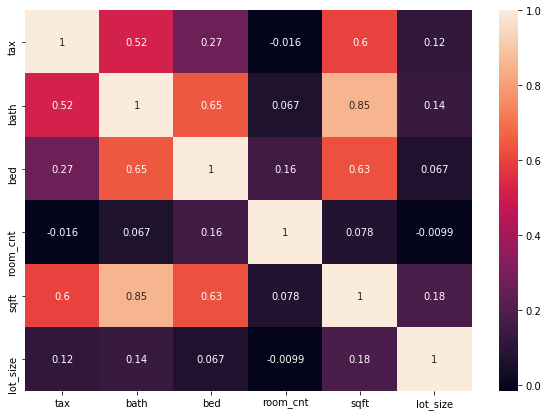

In [3]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [33]:
import split_scale
train, test = split_scale.split_my_data(df, train_ratio=.80, seed=123)

In [4]:
X_train = train[['bath','sqft']]
y_train = train.tax
X_test = test[['bath','sqft']]
y_test = test.tax

from sklearn.linear_model import LinearRegression
predictions=pd.DataFrame({'actual':y_train})

lm1=LinearRegression()
lm1.fit(X_train[['bath','sqft']],y_train)
lm1_predictions=lm1.predict(X_train[['bath','sqft']])
predictions['lm1']=lm1_predictions

#baseline model
predictions['baseline'] = y_train.mean()

In [40]:
import split_scale
import pandas as pd
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
import numpy as np
def standard_scaler(train, test):
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True).fit(train)
    train_scaled = pd.DataFrame(scaler.transform(train), columns=train.columns.values).set_index([train.index.values])
    test_scaled = pd.DataFrame(scaler.transform(test), columns=test.columns.values).set_index([test.index.values])
    return scaler, train_scaled, test_scaled


In [41]:
scaler, train_sc, test_sc = standard_scaler(train[['bath','sqft','tax']], test[['bath','sqft','tax']])

In [44]:
X_train_sc = train_sc[['bath','sqft']]
y_train_sc = train_sc.tax
X_test_sc = test_sc[['bath','sqft']]
y_test_sc = test_sc.tax

In [15]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.api as sm
import model
rf = pd.DataFrame(y_train_sc)
rf = model.linear_model(X_train_sc, y_train_sc)
baseline = model.compute_baseline(y_train_sc)

MSE:  0.6335133334701696 SSE:  7557.180554965653 RMSE:  0.7959355083611798 r^2:  0.3664866665298302


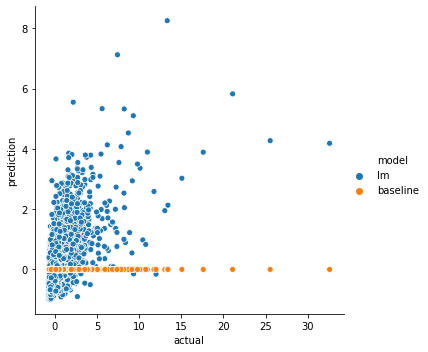

In [16]:
model.evaluate(rf.tax, rf.lm)
model.plot_linear_model(rf.tax, rf.lm, baseline)

In [18]:
from sklearn.linear_model import LinearRegression

lm1 = LinearRegression()

lm1.fit(X_train_sc, y_train_sc)
print("Linear Model:", lm1)

lm1_y_intercept = lm1.intercept_
print("intercept: ", lm1_y_intercept)

lm1_coefficients = lm1.coef_
print("coefficients: ", lm1_coefficients)

Linear Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
intercept:  -8.489391336931796e-18
coefficients:  [-0.00067401  0.60595617]


In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_pred_lm1 = lm1.predict(X_train_sc)
mse_lm1 = mean_squared_error(y_train_sc, y_pred_lm1)
print("linear model\n  mean squared error: {:.3}".format(mse_lm1)) 

r2_lm1 = r2_score(y_train_sc, y_pred_lm1)
print('  {:.2%} of variance in property value can be explained by number of bath and square feet'.format(r2_lm1))

linear model
  mean squared error: 0.634
  36.65% of variance in property value can be explained by number of bath and square feet


In [17]:
X = sm.add_constant(X_train_sc)
est = sm.OLS(y_train_sc, X).fit()
est.summary()

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tax   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     3450.
Date:                Fri, 18 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:03:01   Log-Likelihood:                -14204.
No. Observations:               11929   AIC:                         2.841e+04
Df Residuals:                   11926   BIC:                         2.844e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.816e-17      0.007  -5.24e-15      1.000      -0.014       0.014
bath          -0.0007      0.014     -0.048      0.961      -0.028       0.027
sqft           0.6060      0.014     43.409      0.000       0.579       0.633
==============================================================================
Omnibus:                    18773.606   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26309039.293
Skew:                           9.738   Prob(JB):                         0.00
Kurtosis:                     232.242   Cond. No.                         3.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
def lasso_cv_coef(X_train, y_train): 
    from sklearn.linear_model import LassoCV
    import matplotlib

    reg = LassoCV().fit(X_train, y_train)

    coef = pd.Series(reg.coef_, index = X_train.columns).sort_values(ascending = False)

#     matplotlib.rcParams['figure.figsize'] = (4.0, 5.0)
#     imp_coef.plot(kind = "barh")
#     plt.title("Feature importance using Lasso Model")

    return coef

In [30]:
lasso_cv_coef(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


sqft    436.201692
bath      0.000000
dtype: float64

In [32]:
# only use sqft
X = sm.add_constant(X_train.sqft)
est = sm.OLS(y_train, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tax   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     6900.
Date:                Fri, 18 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:21:41   Log-Likelihood:            -1.7501e+05
No. Observations:               11929   AIC:                         3.500e+05
Df Residuals:                   11927   BIC:                         3.500e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.061e+05   1.14e+04    -26.780      0.000   -3.29e+05   -2.84e+05
sqft         436.8209      5.259     83.065      0.000     426.513     447.129
==============================================================================
Omnibus:                    18774.663   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26319706.396
Skew:                           9.739   Prob(JB):                         0.00
Kurtosis:                     232.289   Cond. No.                     4.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
train_sc.describe()

,bath,sqft,tax
count,1.192900e+04,1.192900e+04,1.192900e+04
mean,-6.908530e-16,-6.833144e-17,-4.778291e-17
std,1.000042e+00,1.000042e+00,1.000042e+00
min,-2.279377e+00,-1.648701e+00,-7.386506e-01
25%,-3.152286e-01,-6.662978e-01,-4.768372e-01
50%,-3.152286e-01,-2.638554e-01,-2.159408e-01
75%,6.668455e-01,4.028474e-01,1.462723e-01
max,8.523438e+00,1.363201e+01,3.259678e+01


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

linear regression train score: 0.3664866665298302
linear regression test score: 0.3490656678596321
ridge regression train score low alpha: 0.3664866665298303
ridge regression test score low alpha: 0.34906566789882537
ridge regression train score high alpha: 0.36648666642691285
ridge regression test score high alpha: 0.34906604841370487


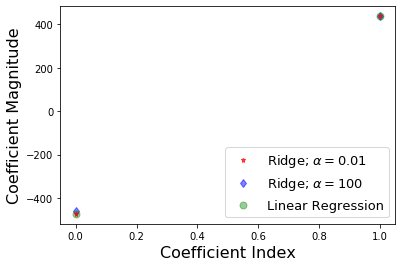

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [57]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

training score: 0.3664866665226665
test score:  0.3490657682754938
number of features used:  2
training score for alpha=0.01: 0.36648666652982953
test score for alpha =0.01:  0.34906566886138285
number of features used: for alpha =0.01: 2
training score for alpha=0.0001: 0.3664866665298303
test score for alpha =0.0001:  0.3490656678696729
number of features used: for alpha =0.0001: 2
LR training score: 0.3664866665298302
LR test score:  0.3490656678596321


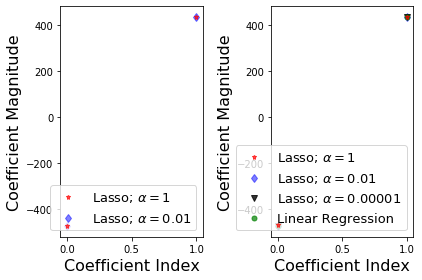

In [58]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001 )
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print ("LR training score:", lr_train_score) 
print ("LR test score: ", lr_test_score)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

In [ ]:
df = wrangle.get_data_from_mysql()

In [5]:
new_name = ["id", "bath", "bed", "fips", "taxable", "tax", "sqft"] 
df.rename(columns=dict(zip(df.columns, new_name)), inplace = True)

In [6]:
# descriptive stats overview
df.describe()

,id,bath,bed,fips,taxable,tax,sqft
count,1.501200e+04,15012.000000,15012.000000,15012.000000,1.501200e+04,15011.000000,15012.000000
mean,1.302684e+07,2.326139,3.312883,6049.386224,5.413201e+05,6593.327045,1942.043165
std,3.721475e+06,1.021804,0.942607,21.238021,7.306037e+05,8449.893492,1001.672378
min,1.071210e+07,0.000000,0.000000,6037.000000,1.050400e+04,51.260000,300.000000
25%,1.150305e+07,2.000000,3.000000,6037.000000,1.986000e+05,2706.520000,1274.750000
50%,1.258217e+07,2.000000,3.000000,6037.000000,3.848850e+05,4771.470000,1679.000000
75%,1.414268e+07,3.000000,4.000000,6059.000000,6.449440e+05,7678.315000,2346.000000
max,1.676392e+08,11.000000,12.000000,6111.000000,2.385837e+07,276797.830000,15450.000000


In [7]:
# check datatype, null, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15012 entries, 0 to 15011
Data columns (total 7 columns):
id         15012 non-null int64
bath       15012 non-null float64
bed        15012 non-null float64
fips       15012 non-null float64
taxable    15012 non-null float64
tax        15011 non-null float64
sqft       15012 non-null float64
dtypes: float64(6), int64(1)
memory usage: 821.0 KB


In [8]:
# peak count of na
df.isna().sum()

id         0
bath       0
bed        0
fips       0
taxable    0
tax        1
sqft       0
dtype: int64

In [9]:
# process na
df = df.dropna()

In [10]:
df["tax_rate"] = df.tax/ df.taxable

In [11]:
df.fips.unique()

array([6037., 6059., 6111.])

In [12]:
tax_dist = df[['fips', 'tax_rate']]
LA = tax_dist[tax_dist.fips == 6037.0]
Orange_County = tax_dist[tax_dist.fips == 6059.0]
Ventura = tax_dist[tax_dist.fips == 6111.0]


In [60]:
Ventura

NameError: name 'Ventura' is not defined

In [32]:
print(Ventura.tax_rate.describe())
print(Orange_County.tax_rate.describe())
print(LA.tax_rate.describe())

count    1295.000000
mean        0.012052
std         0.008276
min         0.000787
25%         0.010741
50%         0.011249
75%         0.011925
max         0.294865
Name: tax_rate, dtype: float64
count    4096.000000
mean        0.012120
std         0.003220
min         0.001712
25%         0.010616
50%         0.011524
75%         0.012529
max         0.107350
Name: tax_rate, dtype: float64
count    9620.000000
mean        0.014175
std         0.007663
min         0.001071
25%         0.012122
50%         0.012636
75%         0.014410
max         0.452884
Name: tax_rate, dtype: float64


In [3]:
y

NameError: name 'gridspec' is not defined

<Figure size 720x360 with 0 Axes>

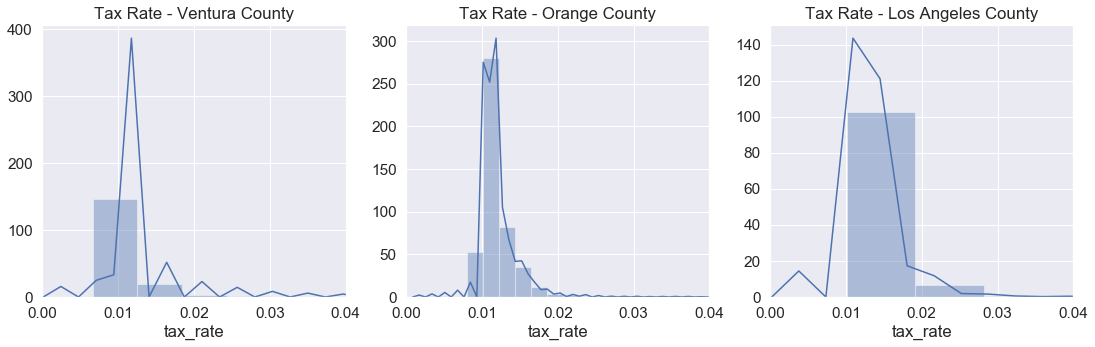

In [19]:
fig = plt.figure(figsize=(25,5))
gs = gridspec.GridSpec(1, 4)
sns.set(font_scale=1.4)

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

# 06111        Ventura County
# 06059        Orange County
# 06037        Los Angeles County

ax1.set_title("Tax Rate - Ventura County")
ax2.set_title("Tax Rate - Orange County")
ax3.set_title("Tax Rate - Los Angeles County")

ax1.set_xlim([0, 0.04])
ax2.set_xlim([0, 0.04])
ax3.set_xlim([0, 0.04])

sns.distplot(Ventura.tax_rate, bins = 50, ax = ax1)
sns.distplot(Orange_County.tax_rate, bins = 50, ax = ax2)
sns.distplot(LA.tax_rate, bins = 50, ax = ax3)

In [14]:
data = df[["bath", "bed", "sqft", "taxable"]]
data.head()

,bath,bed,sqft,taxable
0,2.0,3.0,1458.0,136104.0
1,1.0,2.0,1421.0,35606.0
2,3.0,4.0,2541.0,880456.0
3,2.0,3.0,1650.0,614000.0
4,1.0,2.0,693.0,274237.0


In [15]:
train, test = split_my_data(data, train_ratio=.80, seed=123)

In [16]:
X_train = train.drop(columns = 'taxable')
y_train = train.taxable
X_test = test.drop(columns = 'taxable')
y_test = test.taxable

In [17]:
from sklearn.linear_model import LinearRegression
predictions=pd.DataFrame({'actual':y_train})

lm1=LinearRegression()
lm1.fit(X_train[['bath', 'bed', 'sqft']],y_train)
lm1_predictions=lm1.predict(X_train[['bath', 'bed', 'sqft']])
predictions['lm1']=lm1_predictions

#baseline model
predictions['baseline'] = y_train.mean()

In [18]:
#baseline model
predictions['baseline'] = y_train.mean()

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
import math
MSE_baseline = mean_squared_error(predictions.actual, predictions.baseline)
SSE_baseline = MSE_baseline*len(predictions.actual)
RMSE_baseline = math.sqrt(MSE_baseline)
r2_baseline = r2_score(predictions.actual, predictions.baseline)
print(MSE_baseline,SSE_baseline,RMSE_baseline,r2_baseline)

553446814561.0698 6645789349249326.0 743940.0611346789 0.0


In [20]:
MSE_1 = mean_squared_error(predictions.actual, predictions.lm1)
SSE_1 = MSE_1*len(predictions.actual)
RMSE_1 = math.sqrt(MSE_1)
r2_1 = r2_score(predictions.actual, predictions.lm1)
print(MSE_1,SSE_1,RMSE_1,r2_1)

339299576223.02576 4074309311286093.5 582494.2714079047 0.38693372642840296


In [21]:
model=lm1.predict(X_test)
model=model.ravel().reshape(3003)
y_test1=np.array(y_test).ravel().reshape(3003)
best_model=pd.DataFrame({'predictions':model,'taxable':y_test1})

best_model.head()

,predictions,taxable
0,2.915553e+05,333148.0
1,5.225813e+05,483373.0
2,7.007536e+04,1501306.0
3,4.087877e+05,539525.0
4,1.001706e+06,797339.0


In [22]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.api as sm


In [23]:
## fit a OLS model 
X = sm.add_constant(X_train)
est = sm.OLS(y_train, X).fit()
est.summary()

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                taxable   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     2525.
Date:                Thu, 17 Oct 2019   Prob (F-statistic):               0.00
Time:                        21:20:26   Log-Likelihood:            -1.7645e+05
No. Observations:               12008   AIC:                         3.529e+05
Df Residuals:                   12004   BIC:                         3.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5728.4171   1.95e+04     -0.293      0.769    -4.4e+04    3.26e+04
bath        5.101e+04   1.04e+04      4.911      0.000    3.06e+04    7.14e+04
bed        -1.585e+05   7526.481    -21.059      0.000   -1.73e+05   -1.44e+05
sqft         491.2666     10.356     47.436      0.000     470.966     511.567
==============================================================================
Omnibus:                    19693.538   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         34732199.731
Skew:                          10.556   Prob(JB):                         0.00
Kurtosis:                     265.626   Cond. No.                     8.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(0, 10000000.0)

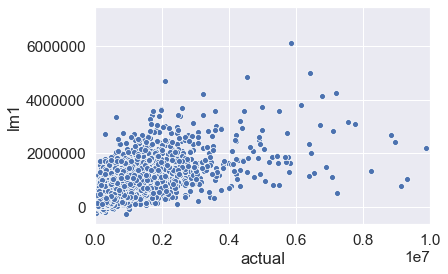

In [24]:
sns.scatterplot(predictions.actual, predictions.lm1)
plt.xlim(0,1e7)

(0, 6500000.0)

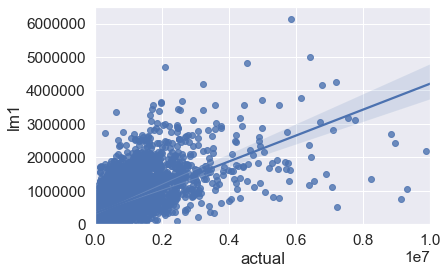

In [25]:
sns.regplot(predictions.actual, predictions.lm1)
plt.xlim(0,1e7)
plt.ylim(0,0.65e7)

In [59]:
import model

In [27]:
rf = pd.DataFrame(y_train)
rf = model.linear_model(X_train, y_train)
baseline = model.compute_baseline(y_train)

In [28]:
rf.head()

,taxable,lm
1229,453460.0,241757.114006
6493,245830.0,563356.408794
6019,52341.0,308078.100504
3155,118128.0,540136.226331
13857,774974.0,734637.168959


In [29]:
model.evaluate(rf.taxable, rf.lm)

MSE:  339299576223.02576 SSE:  4074309311286093.5 RMSE:  582494.2714079047 r^2:  0.38693372642840296


(339299576223.02576,
 4074309311286093.5,
 582494.2714079047,
 0.38693372642840296)

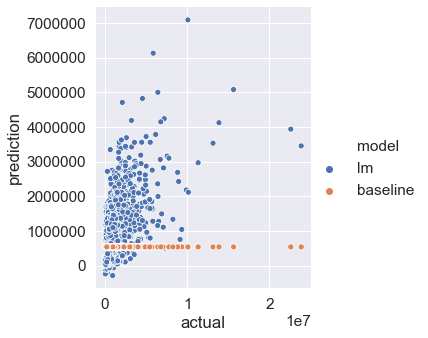

In [30]:
model.plot_linear_model(rf.taxable, rf.lm, baseline)